# Monte Carlo estimator

The _Monte Carlo_ estimator of an integral, $\int_{a}^{b} f(x) dx$, is defined as

$$
F_n = \frac{b-a}{n} \sum_{i=1}^{n} f(X_i),
$$

for random variable $X_i$ drawn uniformly out of the range $[a,\, b]$.

A Monte Carlo estimator can also be defined for non-uniform random variables:

$$
F_n = \frac{1}{n} \sum_{i=1}^{n} \frac{f(X_i)}{p(X_i)},
$$

for random variable $X_i$ drawn from the PDF $p(x)$.

# Example

Let's do the math, using the example mentioned in _Physically Based Rendering_ book.

$$
f(x) = \exp(-1000 (x - 0.25)^2),
$$

and we want to calculate

$$
\int_0^{0.5} \exp(-1000 (x - 0.25)^2) dx.
$$

Wolfram Alpha gives `0.0560499` as the value for the integral.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
x = np.linspace(0.0, 0.5, 1000)
y = np.exp(-1000.0 * (x - 0.25)**2)
expected_value = 0.0560499

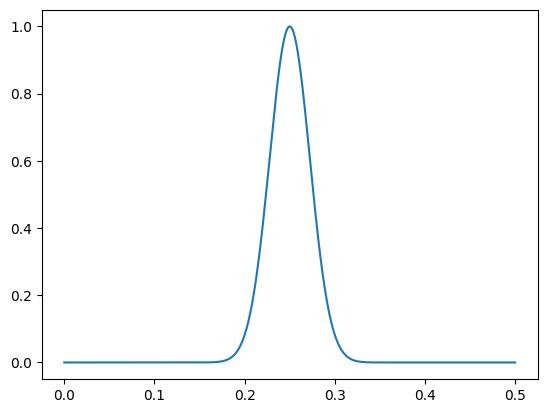

In [40]:
plt.plot(x, y)

$f$ is very close to zero in over half of the domain. We can sample `y` uniformly and obtain a result using the first MC estimator, but it will require lots of samples.

In [41]:

samples = np.random.choice(y, size=100)
f_100 = (0.5 - 0.0) * (1.0 / 100.0) * np.sum(samples)
f_100

0.07392998107908028

In [42]:
samples = np.random.choice(y, size=100000)
f_100000 = (0.5 - 0.0) * (1.0 / 100000.0) * np.sum(samples)
f_100000

0.0560115092253161

In [43]:
estimates = []

for i in range(1000):
    samples = np.random.choice(y, size=1)
    f_1 = (0.5 - 0.0) * (1.0 / 1.0) * np.sum(samples)
    estimates.append(f_1)

mse = np.mean((np.array(estimates) - expected_value)**2)
mse

0.015616675987717531

# Sampling distributions

The recipe for sampling a distribution using _inverse transform sampling_ is as follows.

1. Choose your distribution $p(x)$.
2. Calculate $P(x) = \int_{0}^{x} p(x') dx'$
3. Invert $P(x)$, in terms of the canonical uniform random variable _u_.

## Uniform hemisphere sampling

Uniform probability density over all directions $\omega$, $p(\omega) = c$.

**Normalization**

The integral over the hemisphere H yields the surface area of a hemisphere:
$$
\begin{aligned}
\int_{H} c d \omega &= 2 \pi c = 1 \\
\Longrightarrow c &= \frac{1}{2 \pi}
\end{aligned}
$$

**Coordinate transformation**

Use the result $p(\theta, \, \phi) = \sin \theta p(\omega)$ to obtain

$$
p(\theta, \, \phi) = \frac{\sin \theta}{2 \pi}
$$

**$\theta$'s marginal density**

$$
p(\theta) = \int_{0}^{2 \pi} p(\theta, \, \phi) d \phi = \int_{0}^{2 \pi} \frac{\sin \theta}{2 \pi} d \phi = \sin \theta
$$

**$\phi$'s conditional density**

$$
p(\phi \, | \, \theta) = \frac{p(\theta, \, \phi)}{p(\theta)} = \frac{1}{2 \pi}
$$

**Calculate the CDF's**

$$
\begin{aligned}
P(\theta) &= \int_{0}^{\theta} \sin \theta' d\theta' = 1 - \cos \theta \\
P(\phi \, | \, \theta) &= \int_{0}^{\phi} \frac{1}{2 \pi} d\phi' = \frac{\phi}{2 \pi}
\end{aligned}
$$

**Inverting the CDFs in terms of _u_**

$$
\begin{aligned}
\theta &= \cos^{-1}(1 - u_1) \\
\phi &= 2 \pi u_2
\end{aligned}
$$

We can substitute $u_1 = 1 - u_1$, since it is just another canonical uniform distribution, to obtain

$$
\begin{aligned}
\theta &= \cos^{-1}(u_1) \\
\phi &= 2 \pi u_2
\end{aligned}
$$

Convert $\theta$, $\phi$ back to Cartesian coordinates.

$$
\begin{aligned}
x &= \sin \theta \cos \phi = \sqrt{1 - u_1^2} \cos(2 \pi u_2) \\
y &= \sin \theta \sin \phi = \sqrt{1 - u_1^2} \sin(2 \pi u_2) \\
z &= u_1
\end{aligned}
$$

where we used the identity $\sin \theta = \sqrt{1 - \cos^2 \theta}$.

## Cosine-weighted hemisphere sampling

Set probability density to be $p(\omega) \propto \cos \theta$.

**Normalize**

Integrate $p(\omega)$ over hemisphere H again.

$$
\begin{aligned}
\int_H p(\omega) d\omega &= \int_{0}^{2 \pi} \int_{0}^{\frac{\pi}{2}} c \cos \theta \sin \theta d\theta d\phi = \frac{c}{2} \int_{0}^{2 \pi} d\phi = 1 \\
\Longrightarrow c &= \frac{1}{\pi}
\end{aligned}
$$

**Coordinate transformation**

Again, using the result $p(\theta, \, \phi) = \sin \theta p(\omega)$, obtain

$$
p(\theta, \, \phi) = \frac{1}{\pi} \cos \theta \sin \theta.
$$

**$\theta$'s marginal density**

$$
p(\theta) = \int_{0}^{2 \pi} p(\theta, \, \phi) d \phi = \int_{0}^{2 \pi} \frac{1}{\pi} \cos \theta \sin \theta d \phi = 2 \sin \theta \cos \theta.
$$

**$\phi$'s conditional density**

$$
p(\phi \, | \, \theta) = \frac{p(\theta, \, \phi)}{p(\theta)} = \frac{1}{2 \pi}
$$

**Calculate the CDF's**

$$
\begin{aligned}
P(\theta) &= \int_{0}^{\theta} 2 \cos \theta' \sin \theta' d \theta' = 1 - \cos^2 \theta \\
P(\phi \, | \, \theta) &= \int_{0}^{\phi} \frac{1}{2 \pi} d\phi' = \frac{\phi}{2 \pi}
\end{aligned}
$$

**Inverting the CDFs in terms of _u_**

$$
\begin{aligned}
\cos \theta &= \sqrt{1 - u_1} = \sqrt{u_1} \\
\phi &= 2 \pi u_2
\end{aligned}
$$

where $u_1 = 1 - u_1$ is substituted again.

Converting $\theta$, $\phi$ back to Cartesian coordinates, note that $z = \cos \theta = \sqrt{u_1}$.

$$
\begin{aligned}
x &= \sin \theta \cos \phi = \sqrt{1 - u_1} \cos(2 \pi u_2) \\
y &= \sin \theta \sin \phi = \sqrt{1 - u_1} \sin(2 \pi u_2) \\
z &= \sqrt{u_1}
\end{aligned}
$$

# Directions in a cone

Given a cone with the axis along the +z axis and a spread angle of $\theta_{max}$, uniform directions in the cone are given by

$$
\begin{aligned}
x &= \cos (2 \pi u_1) \sqrt{1 - z^2}\\
y &= \sin (2 \pi u_1) \sqrt{1 - z^2} \\
z &= 1 - u_2 (1 - \cos \theta_{max})
\end{aligned}
$$

The PDF for these samples are

$$
f = \frac{1}{2 \pi (1 - \cos \theta_{max})}
$$

Source: _Sampling Transformations Zoo_, _Ray Tracing Gems_.

## Distributions visualized

In [1]:
def point_in_uniform_distribution(u1, u2):
    sin_theta = np.sqrt(1.0 - u1 * u1)
    x = np.cos(2.0 * np.pi * u2) * sin_theta
    y = np.sin(2.0 * np.pi * u2) * sin_theta
    z = u1

    return x, y, z

def point_in_cosine_distribution(u1, u2):
    sin_theta = np.sqrt(1.0 - u1)
    z = np.sqrt(u1)
    x = np.cos(2.0 * np.pi * u2) * sin_theta
    y = np.sin(2.0 * np.pi * u2) * sin_theta

    return x, y, z

def point_in_cone_distribution(u1, u2, cos_theta_max):
    cos_theta = 1.0 - u1 * (1.0 - cos_theta_max)
    sin_theta = np.sqrt(1.0 - cos_theta * cos_theta)
    phi = 2.0 * np.pi * u2
    x = np.cos(phi) * sin_theta
    y = np.sin(phi) * sin_theta
    z = cos_theta

    return x, y, z

In [5]:
u1 = np.random.uniform(0, 1, 1000)
u2 = np.random.uniform(0, 1, 1000)

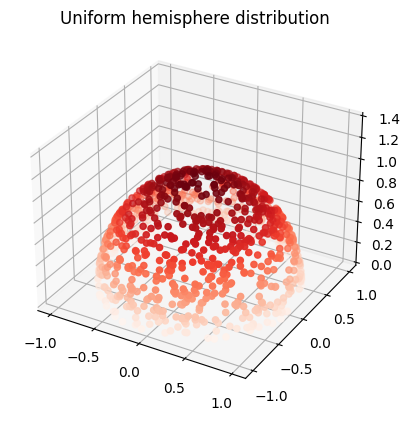

In [46]:
points = [point_in_uniform_distribution(u1[i], u2[i]) for i in range(1000)]
x, y, z = zip(*points)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Reds')
ax.set_title("Uniform hemisphere distribution")
ax.set_zlim(0, 1.4)  # Set the z-axis range
plt.show()

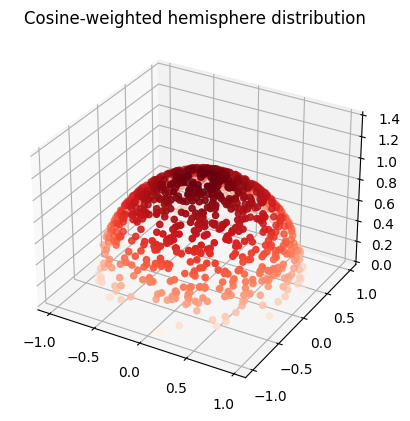

In [50]:
points = [point_in_cosine_distribution(u1[i], u2[i]) for i in range(1000)]
x, y, z = zip(*points)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Reds')
ax.set_title("Cosine-weighted hemisphere distribution")
ax.set_zlim(0, 1.4)  # Set the z-axis range
plt.show()

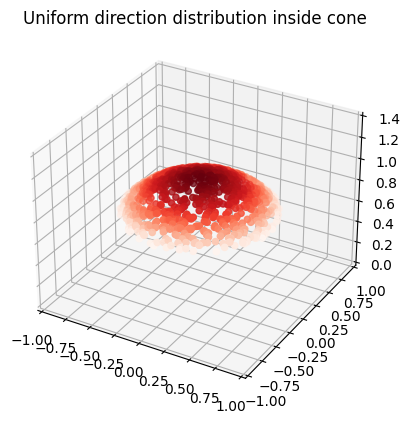

In [11]:
cos_theta_max = np.cos(np.pi / 4)
points = [point_in_cone_distribution(u1[i], u2[i], cos_theta_max) for i in range(1000)]
x, y, z = zip(*points)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Reds')
ax.set_title("Uniform direction distribution inside cone")
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(0, 1.4)  # Set the z-axis range
plt.show()
